# Movie Recommendation System

# Introduction

- For this project our stakeholder is Microsoft. Microsoft has recently broken into the film industry with the start of their new studio. They have also chosen to launch a streaming platform which, to start, will contain movies and their new in-house productions. A recommendation system is a type of information filtering system that aims to predict a user's preference or rating for a particular item. These systems can be found in various areas such as movies, music, news, social tags, and products. Recommendation systems usually provide a list of recommendations to the user, and there are two popular methods to do this - collaborative filtering and content-based filtering.Many popular internet products today, like YouTube, Netflix, Amazon, HBO, Peacock, and Disney rely heavily on recommendation systems to filter through millions of contents and provide personalized recommendations to their users. These systems have been extensively studied and proven to provide significant value to both businesses and consumers.

# Business Understanding

- An information filtering system that predicts the preferences or ratings of an item by a user is known as a recommendation system. Recommendation systems are used in a variety of sectors, such as movies, shopping, music, news, social media, and general products. Generally, recommendation systems generate a list of recommendations, which can be done in several ways, including collaborative filtering or content-based filtering. Recommendation systems power most of the internet products we use today. Popular internet products such as YouTube, Netflix, Amazon, and many others depend on recommendation systems to sift through millions of contents and offer personalized recommendations to their users. Recommendation systems have been extensively researched and have been found to offer significant benefits to both internet businesses and their consumers.
- With the launch of Microsoft's new streaming platform, there is a need for a recommendations system to be in place for new and continued users. A recommendation system enhances the user experience by exposing the user to content that has a high probability of viewership for that specific user. This is vital to the success and continued use of the platform due to the plethora of available content.

# Data Understanding

- This data was provided from MovieLens dataset from the GroupLens research lab at the University of Minnesota. These four datasets with various attributes are imported as the following:
    - df_links (Data/links.csv)
    - df_movies (Data/movies.csv)
    - df_ratings (Data/ratings.csv)
    - df_tags (Data/tags.csv)
- We will explore this data and check for duplicate values, nulls, bias, trends, etc.

In [101]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import surprise
from surprise.prediction_algorithms import *
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
import numpy as np
import datetime as dt


#### Links.csv

In [102]:
# Read in the 'links.csv'
df_links = pd.read_csv("Data/links.csv")
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [103]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [104]:
# Checking the movie ID column for duplicates.
df_links['movieId'].duplicated().sum()

0

#### Movies.csv

In [105]:
# Read in the 'movies.csv'
df_movies = pd.read_csv("Data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [106]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [107]:
# Checking the movie ID column for duplicates.
df_movies['movieId'].duplicated().sum()

0

#### Ratings.csv

In [108]:
# Read in the 'ratings.csv'
df_ratings = pd.read_csv("Data/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [109]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [110]:
# Checking the movie ID column for duplicates.
df_ratings['movieId'].duplicated().sum()

91112

In [111]:
df_ratings['userId']

0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64

In [112]:
# counting the amount of users
print(len(df_ratings['userId'].value_counts() > 1))

610


In [113]:
print((df_ratings['rating'].value_counts()))

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


#### Tags.csv

In [114]:
# Read in 'tags.csv'
df_tags = pd.read_csv("Data/tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [115]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [116]:
df_tags['movieId'].value_counts()

296     181
2959     54
924      41
293      35
7361     34
       ... 
6107      1
5878      1
5876      1
3192      1
8190      1
Name: movieId, Length: 1572, dtype: int64

In [117]:
# Checking the movie ID column for duplicates.
df_tags['movieId'].duplicated().sum()

2111

In [118]:
# Checking how many moveId's have a value count equal to 1.
df_tagid = df_tags['movieId']
df_tagid = df_tagid.to_frame()
print(len(df_tagid['movieId'].value_counts()==1))

1572


In [119]:
# Counting the number of userId's
print(len(df_tags['userId'].value_counts() > 1))

58


In [120]:
####
"""
All code can join on movieID

"""

'\nAll code can join on movieID\n\n'

## Merging Dataframes

In [121]:
# Merge 'links' and 'movie' dataframes on movieId
movies_df = df_links.merge(df_movies, on='movieId')
movies_df = movies_df.dropna()
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
 3   title    9734 non-null   object 
 4   genres   9734 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 456.3+ KB


In [122]:
# Check to see if there are any movieId duplicates.
movies_df['movieId'].duplicated().sum()

0

In [123]:
# Merge new dataframe with the 'ratings.csv'
movie_df = movies_df.merge(df_ratings, on='movieId')
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100823 entries, 0 to 100822
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   imdbId     100823 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100823 non-null  object 
 4   genres     100823 non-null  object 
 5   userId     100823 non-null  int64  
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


In [124]:
# Checking to see how many movieIds are duplicated
movie_df['movieId'].duplicated().sum()

91107

In [125]:
print("In this merged dataset we have", len(movie_df['movieId']) - movie_df['movieId'].duplicated().sum(), "individual movie titles.")

In this merged dataset we have 9716 individual movie titles.


In [126]:
movie_df.describe()

,movieId,imdbId,tmdbId,userId,rating,timestamp
count,100823.000000,1.008230e+05,100823.000000,100823.000000,100823.000000,1.008230e+05
mean,19435.437737,3.515704e+05,20105.462633,326.130823,3.501637,1.205945e+09
std,35532.291269,6.220922e+05,53274.143620,182.618176,1.042430,2.162613e+08
min,1.000000,4.170000e+02,2.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,9.968500e+04,712.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,1.187710e+05,6957.000000,325.000000,3.500000,1.186087e+09
75%,8120.000000,3.149790e+05,11635.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,8.391976e+06,525662.000000,610.000000,5.000000,1.537799e+09


In [127]:
#dfm3 = dfm2.merge(df_tags, on='movieId')
#dfm3.info()

#### - After some exploration of the 'tags.csv', we decided not to use this data. This was due to the fact that the tags were majority created by a couple users and the amount of movies that had tags were only slightly over 1500, which is only about 16%-18% of our movie list.

In [128]:
df_cleaned = movie_df.drop(columns= ['imdbId', 'tmdbId'], axis=1)

In [129]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100823 entries, 0 to 100822
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   userId     100823 non-null  int64  
 4   rating     100823 non-null  float64
 5   timestamp  100823 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [130]:
df_cleaned['genres'].value_counts()

Comedy                                      7194
Drama                                       6290
Comedy|Romance                              3967
Comedy|Drama|Romance                        3000
Comedy|Drama                                2851
                                            ... 
Action|Drama|Mystery|Thriller                  1
Comedy|Musical|Sci-Fi|Western                  1
Adventure|Fantasy|Thriller                     1
Action|Adventure|Fantasy|Horror|Thriller       1
Adventure|Fantasy|Musical|Romance              1
Name: genres, Length: 951, dtype: int64

# Data Preparation

#### Filtering by ratings over 3.0

In [131]:
# filtered_df will only contain ratings over 3.0
df_clean = df_cleaned[df_cleaned['rating'] >= 3.0]

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81754 entries, 0 to 100822
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    81754 non-null  int64  
 1   title      81754 non-null  object 
 2   genres     81754 non-null  object 
 3   userId     81754 non-null  int64  
 4   rating     81754 non-null  float64
 5   timestamp  81754 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.4+ MB


In [132]:
# Movies with the highest average rating
avg_high_rated = df_clean.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_high_rated = avg_high_rated.to_frame()
avg_high_rated.reset_index(level=0, inplace=True)
avg_high_rated.columns = ['title', 'Average Rating']

In [133]:
avg_high_rated.head(10)

,title,Average Rating
0,"American Friend, The (Amerikanische Freund, De...",5.0
1,"Four Days in September (O Que É Isso, Companhe...",5.0
2,Blue Planet II (2017),5.0
3,Front of the Class (2008),5.0
4,Siam Sunset (1999),5.0
5,Immortals (2011),5.0
6,Bobik Visiting Barbos (1977),5.0
7,Sudden Impact (1983),5.0
8,Maniac Cop 2 (1990),5.0
9,"Four Seasons, The (1981)",5.0


In [134]:
# Creating numbers of viewers watched
popular = df_clean.groupby(['title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)

In [135]:
# Creating 'popular' dataframe to put movie titles showing the number of viewers watched
popular = popular.to_frame()
popular.reset_index(level=0, inplace=True)
popular.columns = ['Title', 'Number of Users watched']

In [136]:
popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8442 entries, 0 to 8441
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    8442 non-null   object
 1   Number of Users watched  8442 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 132.0+ KB


In [137]:
genres_split = df_clean.genres.apply(lambda x: x.split(sep='|')).apply(pd.value_counts, 1).fillna(0)
df_clean = pd.concat([df_clean.iloc[:,:], genres_split], axis=1)
df_clean.head()

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
df_clean['(no genres listed)'].sum()

35.0

In [139]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81754 entries, 0 to 100822
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             81754 non-null  int64  
 1   title               81754 non-null  object 
 2   genres              81754 non-null  object 
 3   userId              81754 non-null  int64  
 4   rating              81754 non-null  float64
 5   timestamp           81754 non-null  int64  
 6   Adventure           81754 non-null  float64
 7   Children            81754 non-null  float64
 8   Comedy              81754 non-null  float64
 9   Animation           81754 non-null  float64
 10  Fantasy             81754 non-null  float64
 11  Romance             81754 non-null  float64
 12  Drama               81754 non-null  float64
 13  Thriller            81754 non-null  float64
 14  Action              81754 non-null  float64
 15  Crime               81754 non-null  float64
 16  Hor

In [140]:
import re

def extract_year(title):
    match = re.search('\((\d{4})\)', title)
    if match:
        return match.group(1)
    else:
        return None

df_clean['year'] = df_clean['title'].apply(extract_year)

In [141]:
df_clean['year'].sort_values(ascending=True)

79580     1902
79576     1902
79577     1902
79578     1902
79579     1902
          ... 
100413    None
100414    None
100418    None
100435    None
100588    None
Name: year, Length: 81754, dtype: object

In [142]:
df_clean['year'].isna().sum()

14

In [143]:
df_clean.dropna(subset=['year'], inplace=True)

In [144]:
df_clean['year'].isna().sum()

0

In [145]:
df_clean.head()

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [146]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81740 entries, 0 to 100822
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             81740 non-null  int64  
 1   title               81740 non-null  object 
 2   genres              81740 non-null  object 
 3   userId              81740 non-null  int64  
 4   rating              81740 non-null  float64
 5   timestamp           81740 non-null  int64  
 6   Adventure           81740 non-null  float64
 7   Children            81740 non-null  float64
 8   Comedy              81740 non-null  float64
 9   Animation           81740 non-null  float64
 10  Fantasy             81740 non-null  float64
 11  Romance             81740 non-null  float64
 12  Drama               81740 non-null  float64
 13  Thriller            81740 non-null  float64
 14  Action              81740 non-null  float64
 15  Crime               81740 non-null  float64
 16  Hor

In [147]:
df_clean['year'] = df_clean['year'].astype('int')

In [148]:
df_clean['year'].value_counts()

1995    4999
1994    4364
1999    3609
1996    3515
2000    3287
        ... 
1916       5
1921       5
1908       1
1917       1
1903       1
Name: year, Length: 104, dtype: int64

In [149]:
df_clean_col = df_clean.copy()

In [150]:
df_clean2 = df_clean_col.merge(avg_high_rated, on='title')
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81740 entries, 0 to 81739
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             81740 non-null  int64  
 1   title               81740 non-null  object 
 2   genres              81740 non-null  object 
 3   userId              81740 non-null  int64  
 4   rating              81740 non-null  float64
 5   timestamp           81740 non-null  int64  
 6   Adventure           81740 non-null  float64
 7   Children            81740 non-null  float64
 8   Comedy              81740 non-null  float64
 9   Animation           81740 non-null  float64
 10  Fantasy             81740 non-null  float64
 11  Romance             81740 non-null  float64
 12  Drama               81740 non-null  float64
 13  Thriller            81740 non-null  float64
 14  Action              81740 non-null  float64
 15  Crime               81740 non-null  float64
 16  Horr

In [151]:
df_clean_col.head()

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [152]:
df_clean['1900s'] = ((df_clean['year'] >= 1900) & (df_clean['year'] < 1910)).astype(float)
df_clean['1910s'] = ((df_clean['year'] >= 1910) & (df_clean['year'] < 1920)).astype(float)
df_clean['1920s'] = ((df_clean['year'] >= 1920) & (df_clean['year'] < 1930)).astype(float)
df_clean['1930s'] = ((df_clean['year'] >= 1930) & (df_clean['year'] < 1940)).astype(float)
df_clean['1940s'] = ((df_clean['year'] >= 1940) & (df_clean['year'] < 1950)).astype(float)
df_clean['1950s'] = ((df_clean['year'] >= 1950) & (df_clean['year'] < 1960)).astype(float)
df_clean['1960s'] = ((df_clean['year'] >= 1960) & (df_clean['year'] < 1970)).astype(float)
df_clean['1970s'] = ((df_clean['year'] >= 1970) & (df_clean['year'] < 1980)).astype(float)
df_clean['1980s'] = ((df_clean['year'] >= 1980) & (df_clean['year'] < 1990)).astype(float)
df_clean['1990s'] = ((df_clean['year'] >= 1990) & (df_clean['year'] < 2000)).astype(float)
df_clean['2000s'] = ((df_clean['year'] >= 2000) & (df_clean['year'] < 2010)).astype(float)
df_clean['2010s'] = ((df_clean['year'] >= 2010) & (df_clean['year'] < 2020)).astype(float)

In [153]:
df_clean.head()

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [154]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81740 entries, 0 to 100822
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             81740 non-null  int64  
 1   title               81740 non-null  object 
 2   genres              81740 non-null  object 
 3   userId              81740 non-null  int64  
 4   rating              81740 non-null  float64
 5   timestamp           81740 non-null  int64  
 6   Adventure           81740 non-null  float64
 7   Children            81740 non-null  float64
 8   Comedy              81740 non-null  float64
 9   Animation           81740 non-null  float64
 10  Fantasy             81740 non-null  float64
 11  Romance             81740 non-null  float64
 12  Drama               81740 non-null  float64
 13  Thriller            81740 non-null  float64
 14  Action              81740 non-null  float64
 15  Crime               81740 non-null  float64
 16  Hor

## Data Visualizations

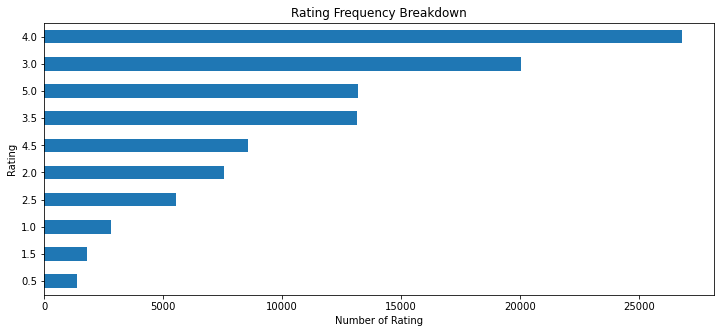

In [155]:
# Plot rating frequency
ax = df_cleaned['rating'].value_counts().plot.barh(figsize=(12,5))
ax.invert_yaxis()
ax.set_ylabel('Rating')
ax.set_xlabel('Number of Rating')
ax.set_title('Rating Frequency Breakdown')
plt.savefig('ratingfreq.png', bbox_inches='tight', dpi=300)

In [156]:
# Showing frequency breakdown of each rating
rtg_countdf = pd.DataFrame(df_clean.groupby(['rating']).size(), columns=['count'])
rtg_countdf.head()

,count
rating,
3.0,20041
3.5,13132
4.0,26814
4.5,8549
5.0,13204


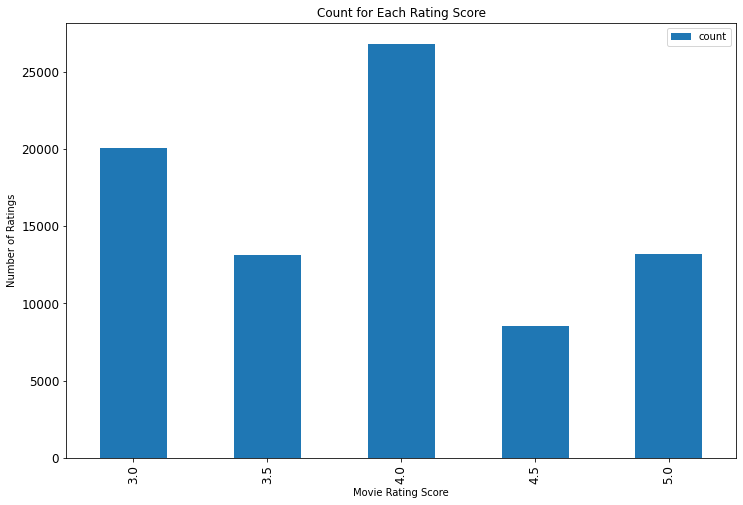

In [157]:
ax = rtg_countdf.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("Movie Rating Score")
ax.set_ylabel("Number of Ratings")
plt.savefig('rtgcount.png', bbox_inches='tight', dpi=300)

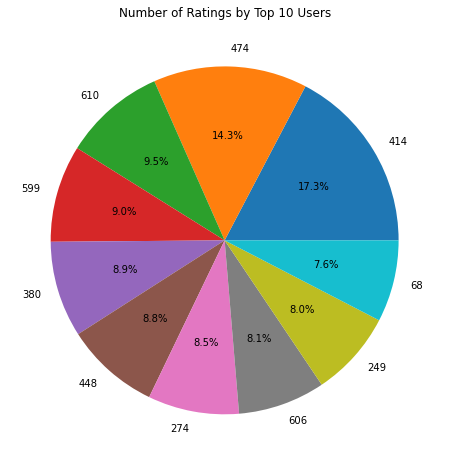

<Figure size 432x288 with 0 Axes>

In [158]:
import matplotlib.pyplot as plt

# group the data by userId and count the number of ratings for each user
user_ratings_counts = df_clean.groupby('userId')['rating'].count()

# get the top 100 users by rating count
top_10_users = user_ratings_counts.sort_values(ascending=False)[:10]

# create a pie chart of the user rating counts for the top 100 users
plt.figure(figsize=(15, 8))
plt.pie(top_10_users.values, labels=top_10_users.index, autopct='%1.1f%%')
plt.title('Number of Ratings by Top 10 Users')
plt.show()
plt.savefig('piechart.png', bbox_inches='tight', dpi=300)

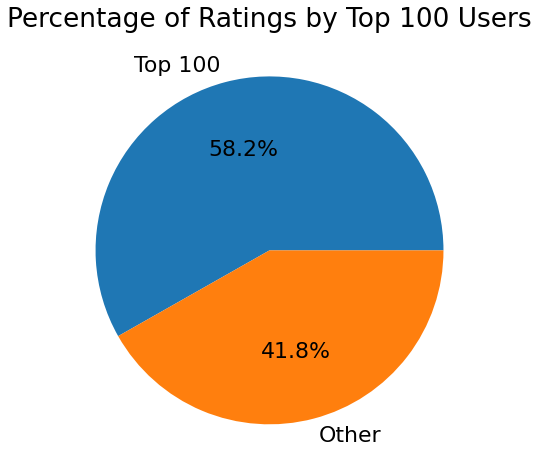

<Figure size 432x288 with 0 Axes>

In [159]:
 import matplotlib.pyplot as plt

# group the data by userId and count the number of ratings for each user
user_ratings_counts = df_clean.groupby('userId')['rating'].count()

# get the top 100 users by rating count
top_100_users = user_ratings_counts.sort_values(ascending=False)[:100]

# get the count of ratings for all users in the top 100
top_100_ratings = top_100_users.sum()

# get the count of ratings for all users not in the top 100
other_ratings = user_ratings_counts.sum() - top_100_ratings

# combine the top 10 users and other into a new dataframe
user_counts = pd.concat([pd.Series({'Top 100': top_100_ratings}), pd.Series({'Other': other_ratings})])

plt.rcParams.update({'font.size': 22})

# create a pie chart of the user rating counts for the top 10 users and other
plt.figure(figsize=(15, 8))
plt.pie(user_counts.values, labels=user_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Ratings by Top 100 Users')
plt.show()
plt.savefig('top100.png', bbox_inches='tight', dpi=300)

In [160]:
df_clean['num_viewers'] = df_clean.groupby('movieId')['userId'].transform('count')

In [161]:
df_clean_col['num_viewers'] = df_clean_col.groupby('movieId')['userId'].transform('count')

In [162]:
df_clean_col.head()

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,num_viewers
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199


In [163]:
df_clean.head()

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,num_viewers
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199


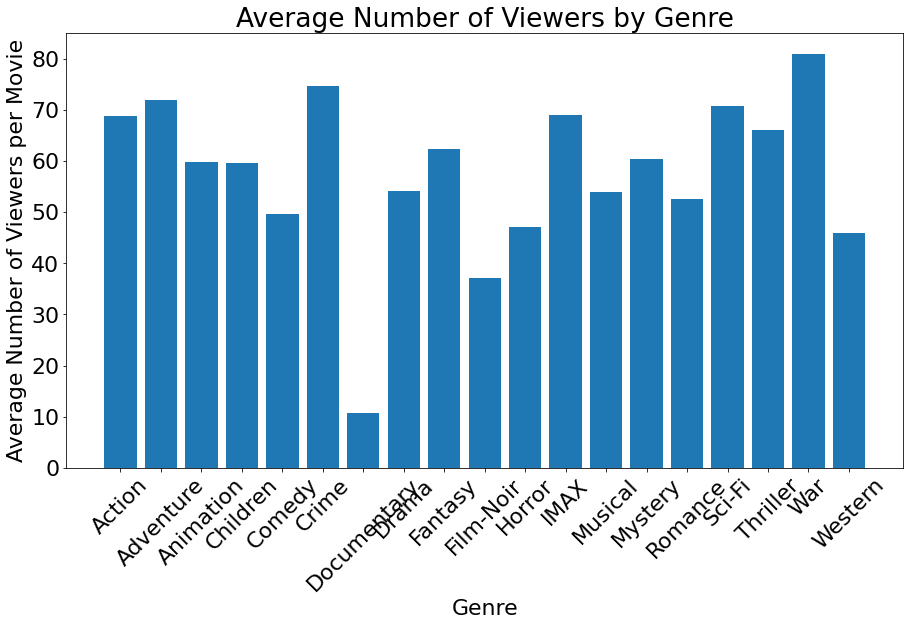

<Figure size 432x288 with 0 Axes>

In [164]:
genres_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Multiply each column by the number of viewers, and sum the results for each genre
genre_views = df_clean[genres_cols].multiply(df_clean['num_viewers'], axis=0).sum()

# Count the number of movies for each genre
genre_counts = df_clean[genres_cols].apply(lambda x: (x == 1.0).sum())

# Divide the sum of viewers by the number of movies to get the average number of viewers per movie for each genre
genre_avg_views = genre_views / genre_counts

# Plot the results
plt.figure(figsize=(15, 8))
plt.bar(genres_cols, genre_avg_views)
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Average Number of Viewers per Movie')
plt.title('Average Number of Viewers by Genre')
plt.show()
plt.savefig('viewergenre.png', bbox_inches='tight', dpi=300)

# Modeling

In [165]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

from surprise import KNNWithMeans, Dataset, accuracy, Reader
from surprise.model_selection import train_test_split

In [166]:
num_users = len(df_clean['userId'].value_counts())
num_items = len(df_clean['title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 609
Unique number of movies in the dataset: 8432


In [167]:
rating_count_df = pd.DataFrame(df_clean.groupby(['rating']).size(), columns=['Num Ratings'])
rating_count_df

,Num Ratings
rating,
3.0,20041
3.5,13132
4.0,26814
4.5,8549
5.0,13204


### Collaborative Filtering

- Collaborative filtering assumes that users who have agreed in the past are likely to agree in the future and have similar preferences. This method generates recommendations by analyzing the rating profiles of different users or items. By identifying other users/items with similar rating histories to the current user/item, it generates recommendations using this information. This technique creates a model based on a user's past actions, including items purchased, selected, or rated. The model is then used to predict items or ratings that the user may be interested in. Collaborative filtering can be classified as memory-based or model-based.

In [168]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from sklearn.preprocessing import MultiLabelBinarizer

In [169]:
reader = Reader(rating_scale=(3.0, 5.0))
data = Dataset.load_from_df(df_clean[['userId', 'movieId', 'rating']], reader)

# split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=.25)

# create an instance of the SVD algorithm and fit it on the training set
algo = SVD()
algo.fit(trainset)

# use the fitted model to predict ratings on the testing set
predictions = algo.test(testset)

# evaluate the performance of the model using different metrics
accuracy.mae(predictions)
accuracy.mse(predictions)

MAE:  0.4852
MSE: 0.3537


0.35372816075671987

In [170]:
# create a dictionary to map movie IDs to their indices in the dataset
movie_to_idx = {movie_id: i for i, movie_id in enumerate(df_clean['movieId'].unique())}

# create an instance of the SVD algorithm and fit it on the training set
algo = SVD()
algo.fit(trainset)

In [171]:
def recommend_movies(user_id):
    # get all movies that the user has not rated yet
    user_movies = df_clean[df_clean['userId'] == user_id]['movieId']
    unrated_movies = [movie_id for movie_id in df_clean['movieId'].unique() if movie_id not in user_movies]

    # create a list of tuples containing the movie ID and the predicted rating
    movie_ratings = [(movie_id, algo.predict(user_id, movie_to_idx[movie_id]).est) for movie_id in unrated_movies]

    # sort the list of tuples by the predicted rating in descending order and get the top 5 movies
    top_movies = sorted(movie_ratings, key=lambda x: x[1], reverse=True)[:5]

    # map the recommended movie indices back to their titles
    recommended_movies = [(df_clean[df_clean['movieId'] == movie_id]['title'].iloc[0], rating) for movie_id, rating in top_movies]

    # create a dataframe with the recommended movie titles and predicted ratings
    recommended_movies_df = pd.DataFrame(recommended_movies, columns=['title', 'predicted_rating'])

    return recommended_movies_df

In [172]:
recommend_movies(400)

,title,predicted_rating
0,"Grifters, The (1990)",5.000000
1,Fallen (1998),5.000000
2,Career Girls (1997),4.923830
3,Boogie Nights (1997),4.921476
4,Maverick (1994),4.902094


In [173]:
user_id = 400 # replace with the ID of the user you want to look up

movies_rated_by_user = df_clean[df_clean['userId'] == user_id][['title', 'rating']].sort_values(by='rating', ascending=False)

print(movies_rated_by_user)

                                                    title  rating
501                                           Heat (1995)     5.0
17077                                        Fargo (1996)     5.0
58450                          Requiem for a Dream (2000)     5.0
2243                          Seven (a.k.a. Se7en) (1995)     5.0
25995   Star Wars: Episode VI - Return of the Jedi (1983)     5.0
82040                                   Inside Man (2006)     5.0
24787   Star Wars: Episode V - The Empire Strikes Back...     5.0
91434                                    Inception (2010)     5.0
19963                               Godfather, The (1972)     5.0
45192                                  Matrix, The (1999)     5.0
18793                                Trainspotting (1996)     5.0
16407                    Silence of the Lambs, The (1991)     5.0
8860                     Shawshank Redemption, The (1994)     5.0
8068                                  Pulp Fiction (1994)     5.0
7813    Lé

### Code for Model Tuning

   - Done to prevent overfitting.

In [174]:
import surprise
from surprise import Dataset, Reader, SVD
from sklearn.metrics.pairwise import cosine_similarity

In [175]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_clean[['userId', 'title', 'rating']], test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)


In [176]:
# Load the dataset using Surprise
from surprise import Dataset, Reader

reader = Reader(rating_scale=(1.0, 5.0))
train_set = Dataset.load_from_df(train_data[['userId', 'title', 'rating']], reader)
test_set = Dataset.load_from_df(test_data[['userId', 'title', 'rating']], reader)
val_set = Dataset.load_from_df(val_data[['userId', 'title', 'rating']], reader)

In [177]:
from surprise import SVD

model = SVD()
train_set_full = train_set.build_full_trainset()
model.fit(train_set_full)


In [178]:
from surprise import accuracy

test_predictions = model.test(test_set.build_full_trainset().build_testset())
val_predictions = model.test(val_set.build_full_trainset().build_testset())

accuracy.mae(test_predictions)
accuracy.mse(val_predictions)

MAE:  0.4893
MSE: 0.3644


0.3643723599340888

In [179]:
from surprise.model_selection import cross_validate

results = cross_validate(model, train_set, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5888  0.6065  0.6061  0.6018  0.6018  0.6010  0.0064  
Fit time          1.82    1.81    1.75    1.76    1.80    1.79    0.03    
Test time         0.04    0.03    0.03    0.03    0.14    0.06    0.04    


In [180]:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[50, 100, 200],'n_epochs': [10, 20, 30], 'lr_all': [0.002, 0.005, 0.01],
               'reg_all': [0.02, 0.1, 0.4]}
gs_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
gs_model.fit(data)
best_rmse = gs_model.best_score['rmse']
best_params = gs_model.best_params['rmse']

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.1min finished


In [181]:
svd = SVD(n_factors=100, n_epochs=10, lr_all=0.005, reg_all=0.4)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.5980
0.5980417234626515


In [182]:
from surprise.model_selection import RandomizedSearchCV

# Define the search space for hyperparameters
param_distributions = {'n_factors': [50, 100, 200],
                       'n_epochs': [10, 20, 30],
                       'lr_all': [0.002, 0.005, 0.01],
                       'reg_all': [0.02, 0.1, 0.4]}
# Create the randomized search object
rs = RandomizedSearchCV(SVD, param_distributions, n_iter=10, measures=['rmse', 'mae'], cv=5)

# Run the randomized search
rs.fit(data)

# Get the best RMSE score and the corresponding hyperparameters
best_rmse = rs.best_score['rmse']
best_params = rs.best_params['rmse']

In [183]:
print('Best RMSE: ' + str(best_rmse))

Best RMSE: 0.5915628155553422


In [184]:


print('Best Params: ' + str(best_params))

Best Params: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}


### Content-based Recommendation System

- This type of recommender system uses specific characteristics or features of an item, such as its description, to suggest similar items to the user. It also takes into account the user's preferences and history to generate personalized recommendations. For example, it can recommend movies that are similar to a movie that the user has watched or based on all of the movies that the user has viewed. The system extracts relevant features from the item and uses the user's history to provide suggestions.

In [185]:
df_clean_col.head()

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,num_viewers
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,199


In [186]:
df_clean_col = df_clean_col.drop(columns='timestamp', axis=1)

In [187]:
df_clean_col = df_clean_col.drop_duplicates(subset='title', keep='first')
df_clean_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8432 entries, 0 to 100822
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             8432 non-null   int64  
 1   title               8432 non-null   object 
 2   genres              8432 non-null   object 
 3   userId              8432 non-null   int64  
 4   rating              8432 non-null   float64
 5   Adventure           8432 non-null   float64
 6   Children            8432 non-null   float64
 7   Comedy              8432 non-null   float64
 8   Animation           8432 non-null   float64
 9   Fantasy             8432 non-null   float64
 10  Romance             8432 non-null   float64
 11  Drama               8432 non-null   float64
 12  Thriller            8432 non-null   float64
 13  Action              8432 non-null   float64
 14  Crime               8432 non-null   float64
 15  Horror              8432 non-null   float64
 16  Myst

In [188]:
df_clean_col = df_clean_col.drop(columns=['(no genres listed)'], inplace=False)

In [189]:
df_clean_col['genres'] = df_clean_col['genres'].str.replace('|', ' ')

In [190]:
type(df_clean_col)

pandas.core.frame.DataFrame

In [191]:
df_clean_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8432 entries, 0 to 100822
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      8432 non-null   int64  
 1   title        8432 non-null   object 
 2   genres       8432 non-null   object 
 3   userId       8432 non-null   int64  
 4   rating       8432 non-null   float64
 5   Adventure    8432 non-null   float64
 6   Children     8432 non-null   float64
 7   Comedy       8432 non-null   float64
 8   Animation    8432 non-null   float64
 9   Fantasy      8432 non-null   float64
 10  Romance      8432 non-null   float64
 11  Drama        8432 non-null   float64
 12  Thriller     8432 non-null   float64
 13  Action       8432 non-null   float64
 14  Crime        8432 non-null   float64
 15  Horror       8432 non-null   float64
 16  Mystery      8432 non-null   float64
 17  Sci-Fi       8432 non-null   float64
 18  War          8432 non-null   float64
 19  Musi

In [192]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81740 entries, 0 to 81739
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             81740 non-null  int64  
 1   title               81740 non-null  object 
 2   genres              81740 non-null  object 
 3   userId              81740 non-null  int64  
 4   rating              81740 non-null  float64
 5   timestamp           81740 non-null  int64  
 6   Adventure           81740 non-null  float64
 7   Children            81740 non-null  float64
 8   Comedy              81740 non-null  float64
 9   Animation           81740 non-null  float64
 10  Fantasy             81740 non-null  float64
 11  Romance             81740 non-null  float64
 12  Drama               81740 non-null  float64
 13  Thriller            81740 non-null  float64
 14  Action              81740 non-null  float64
 15  Crime               81740 non-null  float64
 16  Horr

In [193]:
df_clean_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8432 entries, 0 to 100822
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      8432 non-null   int64  
 1   title        8432 non-null   object 
 2   genres       8432 non-null   object 
 3   userId       8432 non-null   int64  
 4   rating       8432 non-null   float64
 5   Adventure    8432 non-null   float64
 6   Children     8432 non-null   float64
 7   Comedy       8432 non-null   float64
 8   Animation    8432 non-null   float64
 9   Fantasy      8432 non-null   float64
 10  Romance      8432 non-null   float64
 11  Drama        8432 non-null   float64
 12  Thriller     8432 non-null   float64
 13  Action       8432 non-null   float64
 14  Crime        8432 non-null   float64
 15  Horror       8432 non-null   float64
 16  Mystery      8432 non-null   float64
 17  Sci-Fi       8432 non-null   float64
 18  War          8432 non-null   float64
 19  Musi

In [199]:
df_clean4 = df_clean2[['movieId', 'Average Rating']]

In [201]:
df_clean5 = df_clean_col.merge(df_clean4, on='movieId')

In [205]:
df_clean5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81737 entries, 0 to 81736
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movieId         81737 non-null  int64  
 1   title           81737 non-null  object 
 2   genres          81737 non-null  object 
 3   userId          81737 non-null  int64  
 4   rating          81737 non-null  float64
 5   Adventure       81737 non-null  float64
 6   Children        81737 non-null  float64
 7   Comedy          81737 non-null  float64
 8   Animation       81737 non-null  float64
 9   Fantasy         81737 non-null  float64
 10  Romance         81737 non-null  float64
 11  Drama           81737 non-null  float64
 12  Thriller        81737 non-null  float64
 13  Action          81737 non-null  float64
 14  Crime           81737 non-null  float64
 15  Horror          81737 non-null  float64
 16  Mystery         81737 non-null  float64
 17  Sci-Fi          81737 non-null 

In [206]:
df_clean5.drop_duplicates(subset='movieId', inplace=True)

In [207]:
df_clean5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8432 entries, 0 to 81736
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movieId         8432 non-null   int64  
 1   title           8432 non-null   object 
 2   genres          8432 non-null   object 
 3   userId          8432 non-null   int64  
 4   rating          8432 non-null   float64
 5   Adventure       8432 non-null   float64
 6   Children        8432 non-null   float64
 7   Comedy          8432 non-null   float64
 8   Animation       8432 non-null   float64
 9   Fantasy         8432 non-null   float64
 10  Romance         8432 non-null   float64
 11  Drama           8432 non-null   float64
 12  Thriller        8432 non-null   float64
 13  Action          8432 non-null   float64
 14  Crime           8432 non-null   float64
 15  Horror          8432 non-null   float64
 16  Mystery         8432 non-null   float64
 17  Sci-Fi          8432 non-null   

In [208]:
df_clean5['Average Rating'].value_counts()

4.000000    1349
3.500000    1219
3.000000    1087
4.500000     450
3.750000     347
            ... 
3.870787       1
4.176471       1
3.797297       1
3.972222       1
4.345679       1
Name: Average Rating, Length: 869, dtype: int64

In [209]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from sklearn.preprocessing import MultiLabelBinarizer

In [210]:
reader3 = Reader(rating_scale=(3.0, 5.0))
data3 = Dataset.load_from_df(df_clean5[['title', 'year', 'Average Rating']], reader3)

# split the data into training and testing sets
trainset3, testset3 = train_test_split(data3, test_size=.25)

# create an instance of the SVD algorithm and fit it on the training set
algo3 = SVD()
algo3.fit(trainset3)

# use the fitted model to predict ratings on the testing set
predictions3 = algo3.test(testset3)

# evaluate the performance of the model using different metrics
accuracy.mae(predictions3)
accuracy.mse(predictions3)

MAE:  0.3916
MSE: 0.2413


0.24129548475675947

In [211]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [212]:
# import libraries
from surprise import KNNWithMeans, Dataset, Reader
from surprise.model_selection import train_test_split

# define a reader to read the dataframe
reader4 = Reader(rating_scale=(0, 1))

# create a dataset from the dataframe
data4 = Dataset.load_from_df(df_clean5[['title', 'year', 'Average Rating']], reader4)

# split the data into training and testing sets
trainset4, testset4 = train_test_split(data4, test_size=0.2, random_state=42)

# train a content-based model using the KNN algorithm
k = 10
sim_options = {'name': 'cosine', 'user_based': False}
algo4 = KNNWithMeans(k=k, sim_options=sim_options)
algo4.fit(trainset4)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [213]:
# use the fitted model to predict ratings on the testing set
predictions4 = algo4.test(testset4)

# evaluate the performance of the model using different metrics
accuracy.mae(predictions4)
accuracy.mse(predictions4)

MAE:  2.7444
MSE: 7.7544


7.754430308274189

### Hybrid Recommendation System

- A hybrid recommender system combines multiple recommendation techniques to solve problems and improve accuracy. This approach can overcome common issues in recommender systems such as cold start, sparsity, and knowledge engineering bottlenecks. By integrating content-based and collaborative filtering techniques, the hybrid recommender system can leverage the strengths of both approaches and minimize their limitations. Research has shown that hybrid recommender systems perform better than pure content-based or collaborative filtering methods.

In [215]:
import pandas as pd
import surprise
from surprise import accuracy
from surprise import Dataset, Reader, SVD, KNNWithMeans
from surprise.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [219]:
# create a reader to read the dataframe
reader = Reader(rating_scale=(1.0, 5.0))

# create a surprise dataset from the dataframe
data = Dataset.load_from_df(df_clean5[['userId', 'movieId', 'rating']], reader)

# split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# train a content-based model using the KNN algorithm
k = 10
sim_options = {'name': 'cosine', 'user_based': False}
algo_cb = KNNWithMeans(k=k, sim_options=sim_options)
algo_cb.fit(trainset)

# train a collaborative filtering model using SVD
algo_cf = SVD()
algo_cf.fit(trainset)

# for each user and item pair in the test set, make predictions using both models
predictions_cf = algo_cf.test(testset)
predictions_cb = algo_cb.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [220]:
# assign weights to the models
weight_cf = 0.5
weight_cb = 0.5

# combine the predictions from both models using a weighted average
predictions_combined = []

# iterate over each prediction in the test set
for pred_cf, pred_cb in zip(predictions_cf, predictions_cb):
    # extract the user ID and item ID from the prediction
    uid, iid = pred_cf.uid, pred_cf.iid
    
    # calculate the weighted sum of the predicted ratings
    rating_combined = (weight_cf * pred_cf.est) + (weight_cb * pred_cb.est)
    
    # create a new prediction object with the combined rating
    pred_combined = surprise.prediction_algorithms.predictions.Prediction(uid, iid, r_ui=None, est=rating_combined, details=None)
    
    # add the combined prediction to the list
    predictions_combined.append(pred_combined)


In [223]:
##make predictions for all the movies that the user has not yet rated using the hybrid model

# get the list of all movie IDs that the user has not yet rated
user_id = 1  # replace with the user ID you want to get recommendations for
movie_ids = df_clean5[~df_clean5['movieId'].isin(df_clean5[df_clean5['userId'] == user_id]['movieId'])]['movieId']

# create a list of (user_id, movie_id, 0) tuples to make predictions on
testset = [[user_id, movie_id, 0] for movie_id in movie_ids]

# make predictions using both models
predictions_cf = algo_cf.test(testset)
predictions_cb = algo_cb.test(testset)

# combine the predictions from both models using a weighted average
predictions_combined = [(weight_cf * pred_cf.est) + (weight_cb * pred_cb.est) for pred_cf, pred_cb in zip(predictions_cf, predictions_cb)]

# add the predictions to the dataframe
df_clean5.loc[~df_clean5['movieId'].isin(df_clean5[df_clean5['userId'] == user_id]['movieId']), 'hybrid_score'] = predictions_combined

In [224]:
#sort the movies by their hybrid scores and select the top 5 movies

# get the top 5 movie recommendations based on the hybrid scores
top_5_movies = df_clean5[df_clean5['userId'] != user_id].sort_values(by='hybrid_score', ascending=False).head(5)['title']
print(top_5_movies)

61388                      Dune (2000)
79026                 I Origins (2014)
7893           Muriel's Wedding (1994)
45816                Bossa Nova (2000)
80725    Cosmic Scrat-tastrophe (2015)
Name: title, dtype: object


# Recommendation for Top 5

In [228]:
# get the top 5 movie recommendations based on the hybrid scores
top_5_movies = df_clean5[df_clean5['userId'] != user_id].sort_values(by='hybrid_score', ascending=False).head(5)

# iterate over the top 5 recommendations and print the actual rating and predicted rating for each movie
for index, row in top_5_movies.iterrows():
    movie_title = row['title']
    actual_rating = row['rating']
    predicted_rating = row['hybrid_score']
    print(f"Movie: {movie_title}")
    print(f"Actual rating: {actual_rating}")
    print(f"Predicted rating: {predicted_rating}")
    print() 

Movie: Dune (2000)
Actual rating: 5.0
Predicted rating: 4.937597406469139

Movie: I Origins (2014)
Actual rating: 5.0
Predicted rating: 4.901871562765399

Movie: Muriel's Wedding (1994)
Actual rating: 5.0
Predicted rating: 4.899951860573106

Movie: Bossa Nova (2000)
Actual rating: 5.0
Predicted rating: 4.893692489039557

Movie: Cosmic Scrat-tastrophe (2015)
Actual rating: 5.0
Predicted rating: 4.892268213269876



In [229]:
# filter the dataframe to only include movies rated by user_id
movies_rated_by_user = df_clean5[df_clean5['userId'] == user_id]

# get the top 5 movie recommendations based on the hybrid scores
top_5_movies = df_clean5[df_clean5['userId'] != user_id].sort_values(by='hybrid_score', ascending=False).head(5)

# iterate over the top 5 recommendations and print the actual rating and predicted rating for each movie
for rating in [5.0, 4.0, 3.0]:
    movies_with_rating = movies_rated_by_user[movies_rated_by_user['rating'] == rating].head(2)
    for index, row in movies_with_rating.iterrows():
        movie_title = row['title']
        actual_rating = row['rating']
        predicted_rating = row['hybrid_score']
        print(f"Movie: {movie_title}")
        print(f"Actual rating: {actual_rating}")
        print(f"Predicted rating: {predicted_rating}")
        print()
        
    top_movies_with_rating = top_5_movies[top_5_movies['rating'] == rating].head(2)
    for index, row in top_movies_with_rating.iterrows():
        movie_title = row['title']
        actual_rating = "N/A"
        predicted_rating = row['hybrid_score']
        print(f"Movie: {movie_title}")
        print(f"Actual rating: {actual_rating}")
        print(f"Predicted rating: {predicted_rating}")
        print()
 

Movie: Seven (a.k.a. Se7en) (1995)
Actual rating: 5.0
Predicted rating: nan

Movie: Usual Suspects, The (1995)
Actual rating: 5.0
Predicted rating: nan

Movie: Dune (2000)
Actual rating: N/A
Predicted rating: 4.937597406469139

Movie: I Origins (2014)
Actual rating: N/A
Predicted rating: 4.901871562765399

Movie: Toy Story (1995)
Actual rating: 4.0
Predicted rating: nan

Movie: Grumpier Old Men (1995)
Actual rating: 4.0
Predicted rating: nan

Movie: From Dusk Till Dawn (1996)
Actual rating: 3.0
Predicted rating: nan

Movie: Clerks (1994)
Actual rating: 3.0
Predicted rating: nan



# Conclusion